In [ ]:
# Install necessary libraries
!pip install opencv-python-headless matplotlib numpy

# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

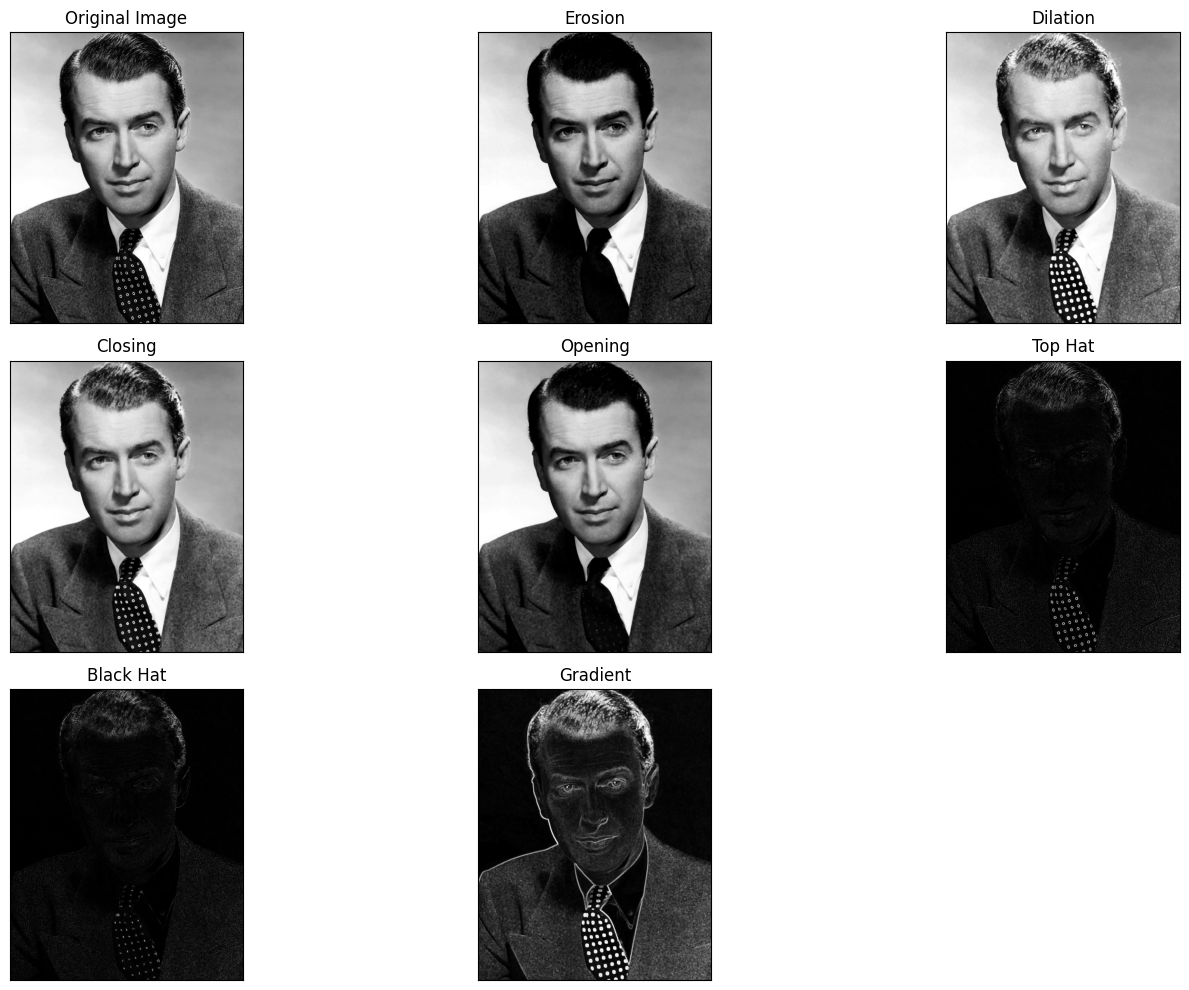

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Update the path to your image
image_path = '/content/james.jpg'

# Read the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded properly
if image is None:
    print("Error: Image not found or unable to load.")
else:
    # Define the kernel
    kernel = np.ones((5,5), np.uint8)

    # Apply morphological operations
    erosion = cv2.erode(image, kernel, iterations=1)
    dilation = cv2.dilate(image, kernel, iterations=1)
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    top_hat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
    black_hat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)
    gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

    # List of titles and images for plotting
    titles = ['Original Image', 'Erosion', 'Dilation', 'Closing', 'Opening', 'Top Hat', 'Black Hat', 'Gradient']
    images = [image, erosion, dilation, closing, opening, top_hat, black_hat, gradient]

    # Plot the images
    plt.figure(figsize=(15, 10))
    for i in range(8):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.show()


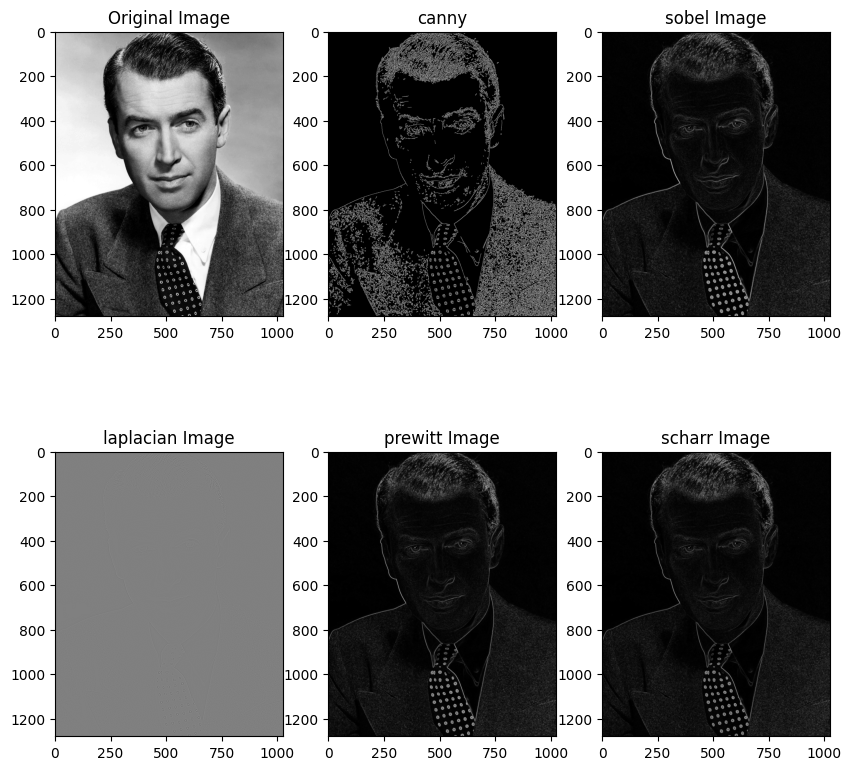

In [ ]:
#import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

#import the image for edge detection
img = cv2.imread(r'/content/james.jpg')
#convert it to grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Canny Edge Detection
canny_edge = cv2.Canny(gray, 100, 200)


#sobel edge Detection
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
sobel = cv2.sqrt(cv2.add(cv2.pow(sobelx, 2), cv2.pow(sobely, 2)))


#laplacian
laplacian = cv2.Laplacian(gray, cv2.CV_64F)

#Prewitt
# Define Prewitt kernels
kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)

# Apply Prewitt edge detector
prewittx = cv2.filter2D(gray, cv2.CV_64F, kernelx) # Change the data type here to CV_64F
prewitty = cv2.filter2D(gray, cv2.CV_64F, kernely) # Change the data type here to CV_64F
prewitt = cv2.sqrt(cv2.add(cv2.pow(prewittx, 2), cv2.pow(prewitty, 2)))

#sharr
scharrx = cv2.Scharr(gray, cv2.CV_64F, 1, 0)
scharry = cv2.Scharr(gray, cv2.CV_64F, 0, 1)
scharr = cv2.sqrt(cv2.add(cv2.pow(scharrx, 2), cv2.pow(scharry, 2)))

#plot everything
plt.figure(figsize=(10, 10))
plt.subplot(2, 3, 1),plt.imshow(gray, cmap='gray'),plt.title('Original Image')
plt.subplot(2, 3, 2),plt.imshow(canny_edge, cmap='gray'),plt.title('canny')
plt.subplot(2, 3, 3),plt.imshow(sobel, cmap='gray'),plt.title('sobel Image')
plt.subplot(2, 3, 4),plt.imshow(laplacian, cmap='gray'),plt.title('laplacian Image')
plt.subplot(2, 3, 5),plt.imshow(prewitt, cmap='gray'),plt.title('prewitt Image')
plt.subplot(2, 3, 6),plt.imshow(scharr, cmap='gray'),plt.title('scharr Image')
plt.show()

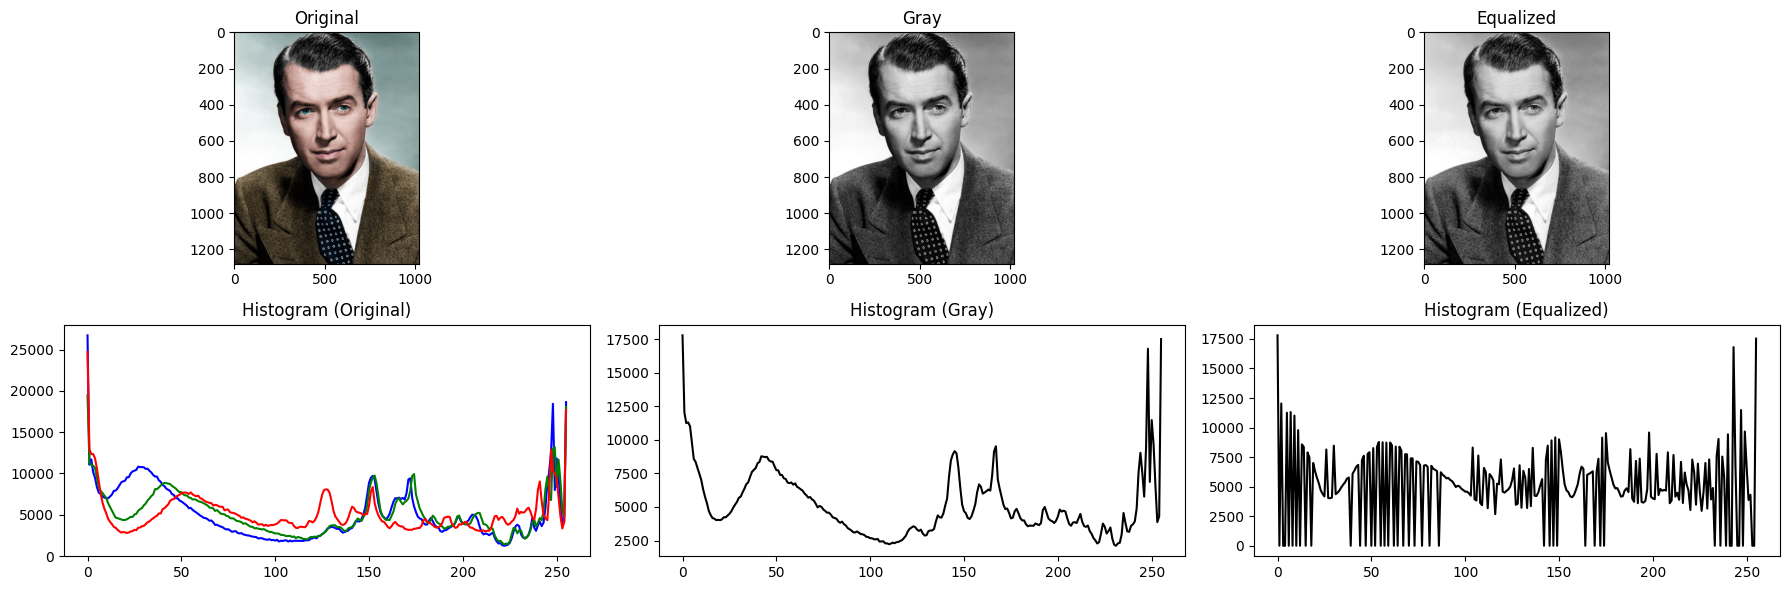

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Import image
img = cv2.imread(r'/content/james.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Histogram equalization
equ = cv2.equalizeHist(gray)

# Calculate histograms
hist_img = [cv2.calcHist([img], [i], None, [256], [0, 256]) for i in range(3)]
hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 256])
hist_equ = cv2.calcHist([equ], [0], None, [256], [0, 256])

plt.figure(figsize=(18, 6))

# Display images
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')

plt.subplot(2, 3, 2)
plt.imshow(gray, cmap='gray'), plt.title('Gray')

plt.subplot(2, 3, 3)
plt.imshow(equ, cmap='gray'), plt.title('Equalized')

# Display histograms
plt.subplot(2, 3, 4)
for i, col in enumerate(['b', 'g', 'r']):
    plt.plot(hist_img[i], color=col)
plt.title('Histogram (Original)')

plt.subplot(2, 3, 5)
plt.plot(hist_gray, color='k')
plt.title('Histogram (Gray)')

plt.subplot(2, 3, 6)
plt.plot(hist_equ, color='k')
plt.title('Histogram (Equalized)')

plt.tight_layout()
plt.show()

Saving james.jpg to james (9).jpg


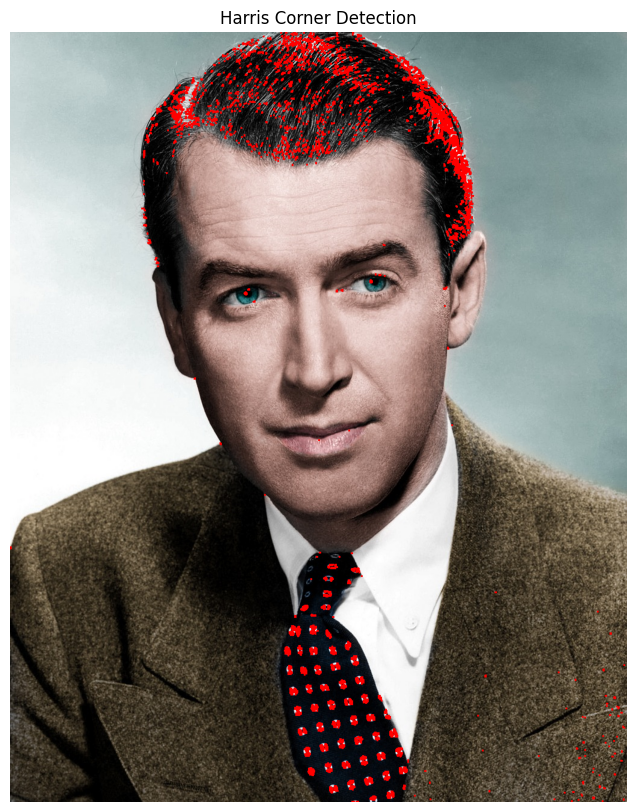

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

# Step 1: Upload the image
uploaded = files.upload()

# Get the filename of the uploaded image
filename = next(iter(uploaded))

# Step 2: Load the image
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 3: Detect corners using the Harris Corner Detector
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Step 4: Dilate the corner markers for better visualization
dst = cv2.dilate(dst, None)

# Step 5: Mark the corners on the original image
img[dst > 0.01 * dst.max()] = [0, 0, 255]

# Step 6: Convert BGR to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Step 7: Display the result using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

Upload the first image (queryImage):


Saving butterfly-8449825_1280.png to butterfly-8449825_1280.png
Upload the second image (trainImage):


Saving insect-8595108_1280.png to insect-8595108_1280.png


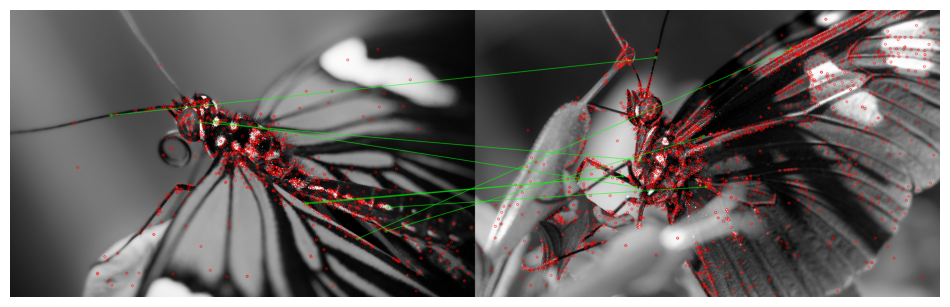

In [ ]:
# Step 1: Install required libraries
#!pip install opencv-python-headless opencv-contrib-python-headless

# Step 2: Import necessary libraries
import numpy as np
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Step 3: Upload images to Colab environment
print("Upload the first image (queryImage):")
uploaded1 = files.upload()

print("Upload the second image (trainImage):")
uploaded2 = files.upload()

# Step 4: Load the images
# Replace the file names with the actual names of your uploaded files
query_image_filename = list(uploaded1.keys())[0]
train_image_filename = list(uploaded2.keys())[0]

img1 = cv.imread(query_image_filename, cv.IMREAD_GRAYSCALE)  # queryImage
img2 = cv.imread(train_image_filename, cv.IMREAD_GRAYSCALE)  # trainImage

# Step 5: Check if images are loaded properly
if img1 is None or img2 is None:
    print("Error: One or both images were not loaded correctly. Check the filenames and try again.")
else:


    # Initiate SIFT detectoer
    sift = cv.SIFT_create()

    # Find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # FLANN parameters
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)  # or pass empty dictionary
    flann = cv.FlannBasedMatcher(index_params, search_params)

    # Perform the matching between the two images
    matches = flann.knnMatch(des1, des2, k=2)

    # Need to draw only good matches, so create a mask
    matchesMask = [[0, 0] for i in range(len(matches))]

    # Ratio test as per Lowe's paper
    for i, (m, n) in enumerate(matches):
        if m.distance < 0.7 * n.distance:
            matchesMask[i] = [1, 0]

    # Draw parameters for matches
    draw_params = dict(matchColor=(0, 255, 0),
                       singlePointColor=(255, 0, 0),
                       matchesMask=matchesMask,
                       flags=cv.DrawMatchesFlags_DEFAULT)

    # Draw matches
    img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)

    # Adjust the output image size
    plt.figure(figsize=(12, 12))  # Adjust the figsize to change the size of the output image
    plt.imshow(img3)
    plt.axis('off')  # Optional: Hide the axis
    plt.show()

Saving james.jpg to james.jpg


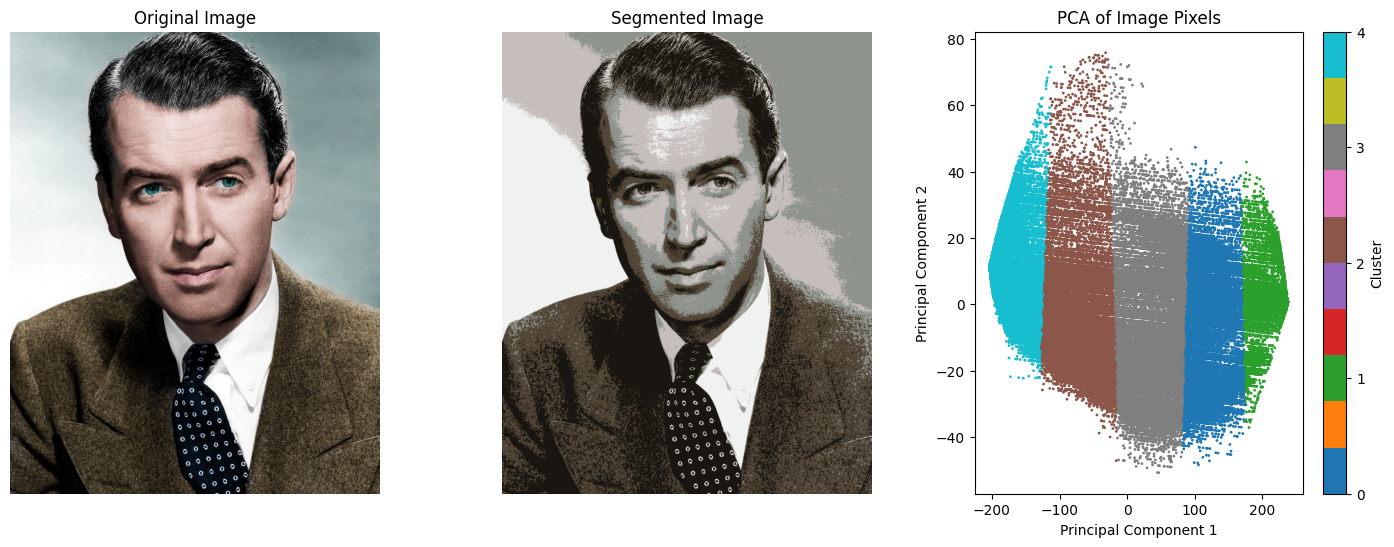

Done


In [ ]:
# Import necessary libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from google.colab import files
`
# Upload the image
uploaded = files.upload()

# Extract the filename from the uploaded files
image_path = list(uploaded.keys())[0]

# Function to perform K-means clustering on image pixels and plot PCA
def kmeans_on_image(image_path, cluster_n):
    # Load the image
    img = cv.imread(image_path)
    if img is None:
        raise ValueError("Image not found or unable to load.")

    # Convert the image to RGB
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Reshape the image to a 2D array of pixels
    pixel_values = img_rgb.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Perform K-means clustering
    term_crit = (cv.TERM_CRITERIA_EPS, 30, 0.1)
    _, labels, centers = cv.kmeans(pixel_values, cluster_n, None, term_crit, 10, cv.KMEANS_RANDOM_CENTERS)

    # Convert centers to uint8
    centers = np.uint8(centers)

    # Map the labels to center colors
    segmented_img = centers[labels.flatten()]

    # Reshape segmented image to original dimensions
    segmented_img = segmented_img.reshape(img_rgb.shape)

    # Apply PCA for 2D visualization
    pca = PCA(n_components=2)
    pixel_values_pca = pca.fit_transform(pixel_values)

    # Create a scatter plot for PCA
    plt.figure(figsize=(18, 6))

    # Plot the original and segmented images
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(segmented_img)
    plt.title('Segmented Image')
    plt.axis('off')

    # Plot PCA results
    plt.subplot(1, 3, 3)
    scatter = plt.scatter(pixel_values_pca[:, 0], pixel_values_pca[:, 1], c=labels.flatten(), cmap='tab10', s=1)
    plt.colorbar(scatter, ticks=range(cluster_n), label='Cluster')
    plt.title('PCA of Image Pixels')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    plt.show()

    print('Done')

# Number of clusters
cluster_n = 5
kmeans_on_image(image_path, cluster_n)


Enter the number of clusters (K): 6


<IPython.core.display.Javascript object>

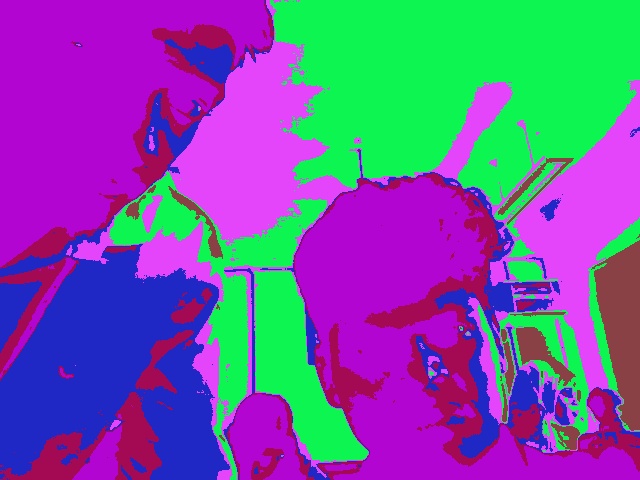

In [ ]:
# Import necessary libraries
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import io
from PIL import Image

# JavaScript to capture an image from the webcam
def capture_image():
    js = Javascript('''
    async function capture() {
        const video = document.createElement('video');
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output canvas to match the video feed.
        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        video.remove();
        return canvas.toDataURL('image/png');
    }
    capture();
    ''')
    display(js)
    data = eval_js('capture()')
    binary = b64decode(data.split(',')[1])
    image = Image.open(io.BytesIO(binary))
    return cv.cvtColor(np.array(image), cv.COLOR_BGR2RGB)

# Apply K-means clustering to the captured image
def apply_kmeans(image, K=6):
    # Reshape the image to a 2D array of pixels
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Define criteria and apply K-means
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv.kmeans(pixel_values, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

    # Convert centers back to uint8
    centers = np.uint8(centers)

    # Map labels to colors
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)

    # Create a color palette for the clusters
    colors = np.random.randint(0, 255, size=(K, 3))

    # Reshape labels to match the original image shape
    labels_reshaped = labels.reshape(image.shape[0], image.shape[1])

    # Color each cluster distinctly
    color_image = np.zeros_like(image)
    for i in range(K):
        color_image[labels_reshaped == i] = colors[i]

    return color_image

# Capture and display images from the webcam
def main():
    try:
        # Prompt the user to enter the number of clusters
        K = int(input("Enter the number of clusters (K): "))
        if K < 1:
            raise ValueError("The number of clusters (K) must be greater than 0.")
    except ValueError as e:
        print(f"Invalid input: {e}. Please enter a valid integer.")
        return

    image = capture_image()  # Capture image from the webcam
    if image is not None:
        clustered_image = apply_kmeans(image, K=K)  # Apply K-means clustering
        cv2_imshow(clustered_image)  # Display the clustered image
    else:
        print("Failed to capture image from webcam.")

main()


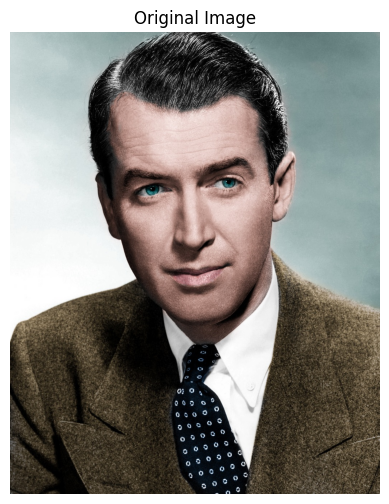

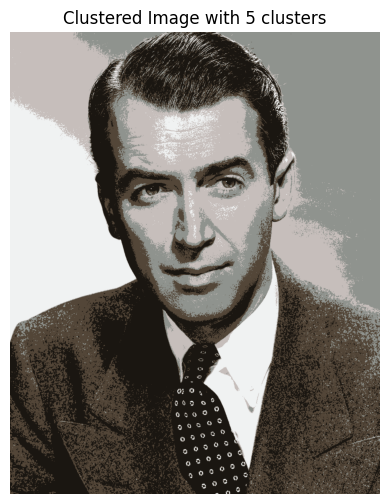

In [ ]:
#!/usr/bin/env python

'''
K-means clustering on an input image.
Clusters the pixel colors of the image and shows the result.
'''

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

class KMeansImageCluster:
    def __init__(self, image_path, cluster_n):
        self.cluster_n = cluster_n
        self.image = cv.imread(image_path)  # Load the image
        if self.image is None:
            raise FileNotFoundError(f"Image at path {image_path} not found.")
        self.img_size = self.image.shape[:2]  # Get the size of the image (height, width)

    def apply_kmeans(self):
        """Apply K-means clustering on the image."""
        # Reshape the image into a 2D array of pixels (each pixel is represented by RGB values)
        img_data = self.image.reshape((-1, 3))
        img_data = np.float32(img_data)  # Convert to float32 for K-means

        # Define criteria for K-means clustering
        term_crit = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

        # Apply K-means clustering
        _ret, labels, centers = cv.kmeans(img_data, self.cluster_n, None, term_crit, 10, cv.KMEANS_RANDOM_CENTERS)

        # Convert the centers to uint8 (the color values of the cluster centers)
        centers = np.uint8(centers)

        # Replace pixel values with their respective cluster center values
        clustered_img_data = centers[labels.flatten()]

        # Reshape the data back to the shape of the original image
        clustered_img = clustered_img_data.reshape(self.image.shape)

        return clustered_img

    def display_image(self, img, title="Image"):
        """Display the given image using Matplotlib."""
        plt.figure(figsize=(6, 6))
        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convert BGR (OpenCV) to RGB (Matplotlib)
        plt.imshow(img_rgb)
        plt.title(title)
        plt.axis('off')
        plt.show()

    def run(self):
        """Run the K-means clustering on the image and display the result."""
        clustered_img = self.apply_kmeans()

        # Display the original and clustered images side by side
        self.display_image(self.image, "Original Image")
        self.display_image(clustered_img, f"Clustered Image with {self.cluster_n} clusters")


# Initialize and run the K-means image clustering
if __name__ == '__main__':
    image_path = 'path_to_your_image.jpg'  # Replace with your image path
    cluster_n = 5  # Number of clusters

    kmeans_image_cluster = KMeansImageCluster(image_path, cluster_n)
    kmeans_image_cluster.run()


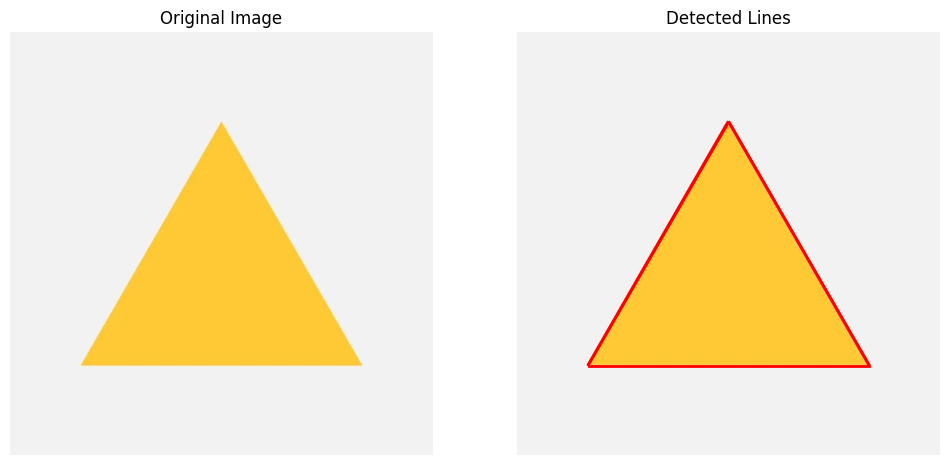

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Sample image filename
image_path ='/content/yello.png'  # Upload this image to your Colab session

# Read the image
src = cv2.imread(image_path)
if src is None:
    raise FileNotFoundError(f"File '{image_path}' does not exist. Please check the file path and try again.")

# Convert to grayscale
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# Perform Canny edge detection
edges = cv2.Canny(src_gray, 50, 200)

# Perform Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength=50, maxLineGap=10)

# Display results in a single figure with subplots
plt.figure(figsize=(12, 6))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Plot image with detected lines
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')
plt.axis('off')

# Plot lines
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        plt.plot([x1, x2], [y1, y2], 'r-', linewidth=2)

plt.show()


Saving finaly.jpg to finaly.jpg
Image 'finaly.jpg' uploaded successfully.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 128MB/s]


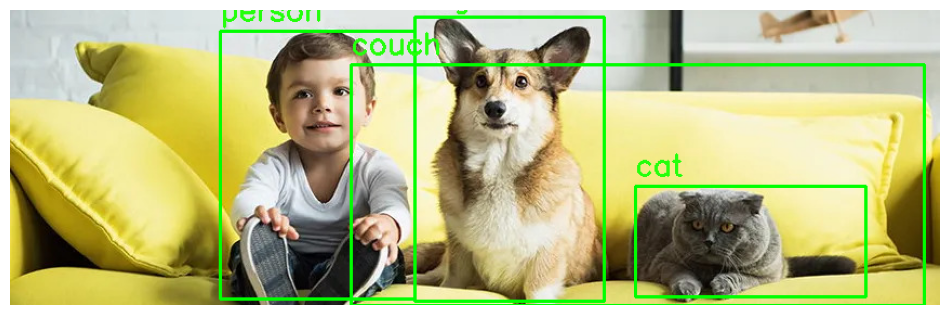

In [ ]:

# Step 2: Import Libraries
import cv2
import numpy as np
import torch
from torchvision import models
import torchvision.transforms as T
import matplotlib.pyplot as plt
from google.colab import files

# Step 3: Upload Image File
uploaded = files.upload()

# Step 4: Get the Uploaded File Name
image_path = list(uploaded.keys())[0]  # Get the name of the uploaded file

# Verify if the image was uploaded successfully
if image_path:
    print(f"Image '{image_path}' uploaded successfully.")
else:
    print("Error: No image was uploaded. Please try again.")

# Step 5: Load the Pre-trained Mask R-CNN Model
model = models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 6: Define Function to Perform Object Detection
def detect_objects(image_path):
    # Read the input image
    image = cv2.imread(image_path)

    # Check if the image is loaded properly
    if image is None:
        print("Error: Image not loaded. Check the file path or ensure the file exists.")
        return

    # Convert BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Transform image to match the model's input requirements
    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image_rgb)

    # Perform object detection
    with torch.no_grad():
        output = model([image_tensor])

    # Get the detected boxes, labels, and scores
    boxes = output[0]['boxes'].numpy()
    labels = output[0]['labels'].numpy()
    scores = output[0]['scores'].numpy()

    # Define labels for COCO dataset
    coco_labels = [
        '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
        'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
        'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
        'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
        'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork',
        'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
        'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet',
        'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
        'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
    ]

    # Set detection threshold
    detection_threshold = 0.7

    # Plot the detections on the image
    for i in range(len(boxes)):
        if scores[i] > detection_threshold:
            # Draw the bounding box
            (x1, y1, x2, y2) = boxes[i].astype(int)
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Add label
            label = coco_labels[labels[i]]
            cv2.putText(image_rgb, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Display the image
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Step 7: Run Detection on Your Image
if image_path:
    detect_objects(image_path)


Saving finaly.jpg to finaly (2).jpg
Image 'finaly (2).jpg' uploaded successfully.


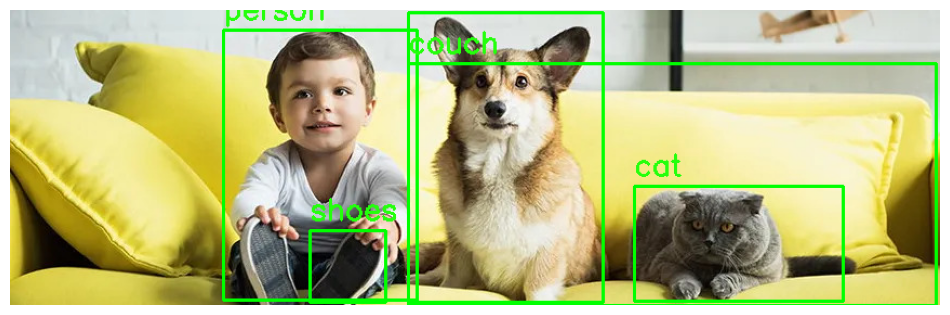

In [ ]:
# Step 2: Import Libraries
import cv2
import numpy as np
import torch
from torchvision import models
import torchvision.transforms as T
import matplotlib.pyplot as plt
from google.colab import files

# Step 3: Upload Image File
uploaded = files.upload()

# Step 4: Get the Uploaded File Name
image_path = list(uploaded.keys())[0]  # Get the name of the uploaded file

# Verify if the image was uploaded successfully
if image_path:
    print(f"Image '{image_path}' uploaded successfully.")
else:
    print("Error: No image was uploaded. Please try again.")

# Step 5: Load the Pre-trained Faster R-CNN Model
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 6: Define Function to Perform Object Detection
def detect_objects(image_path):
    # Read the input image
    image = cv2.imread(image_path)

    # Check if the image is loaded properly
    if image is None:
        print("Error: Image not loaded. Check the file path or ensure the file exists.")
        return

    # Convert BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Transform image to match the model's input requirements
    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image_rgb)

    # Perform object detection
    with torch.no_grad():
        output = model([image_tensor])

    # Get the detected boxes, labels, and scores
    boxes = output[0]['boxes'].numpy()
    labels = output[0]['labels'].numpy()
    scores = output[0]['scores'].numpy()

    # Define labels for COCO dataset
    coco_labels = [
        '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
        'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
        'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
        'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
        'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork',
        'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
        'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet',
        'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'shoes', 'microwave', 'oven', 'toaster', 'sink',
        'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
    ]

    # Set detection threshold
    detection_threshold = 0.7

    # Plot the detections on the image
    for i in range(len(boxes)):
        if scores[i] > detection_threshold:
            # Draw the bounding box
            (x1, y1, x2, y2) = boxes[i].astype(int)
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Add label
            label = coco_labels[labels[i]]
            cv2.putText(image_rgb, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Display the image
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Step 7: Run Detection on Your Image
if image_path:
    detect_objects(image_path)


Saving james.jpg to james.jpg
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


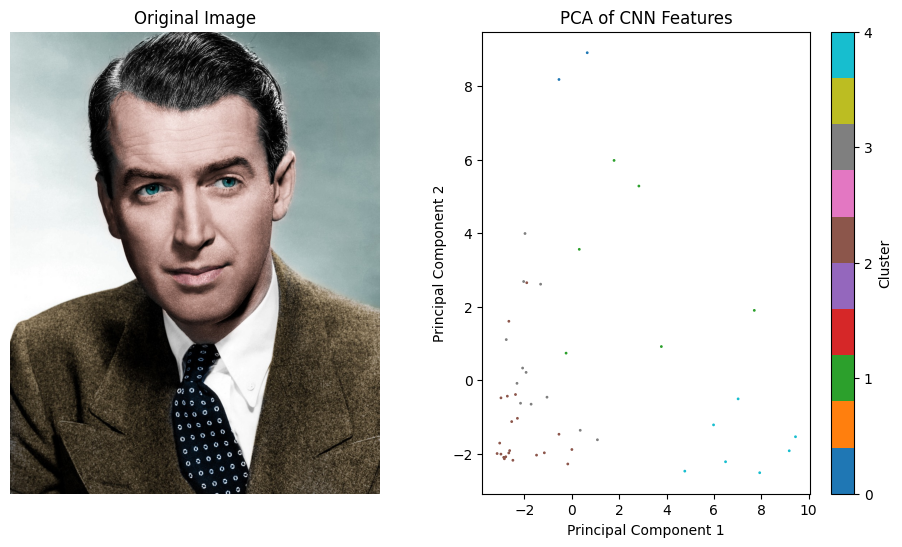

K-means clustering done using CNN features.


In [ ]:
# Import necessary libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from google.colab import files
from tensorflow.keras.applications import VGG16
from sklearn.metrics import accuracy_score

# Upload the image
uploaded = files.upload()

# Extract the filename from the uploaded files
image_path = list(uploaded.keys())[0]

# Function to perform K-means clustering on CNN features and plot PCA
def cnn_kmeans_on_image(image_path, cluster_n):
    # Load the image
    img = cv.imread(image_path)
    if img is None:
        raise ValueError("Image not found or unable to load.")

    # Convert the image to RGB
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Resize the image for CNN input
    img_resized = cv.resize(img_rgb, (224, 224))

    # Load pre-trained VGG16 model + higher level layers
    vgg_model = VGG16(weights='imagenet', include_top=False)

    # Preprocess the image for the CNN
    img_preprocessed = np.expand_dims(img_resized, axis=0)
    img_preprocessed = img_preprocessed / 255.0

    # Extract features using VGG16
    features = vgg_model.predict(img_preprocessed)
    features = features.reshape(-1, features.shape[-1])

    # Perform K-means clustering on extracted features
    term_crit = (cv.TERM_CRITERIA_EPS, 30, 0.1)
    _, labels, centers = cv.kmeans(features.astype(np.float32), cluster_n, None, term_crit, 10, cv.KMEANS_RANDOM_CENTERS)

    # Apply PCA for 2D visualization
    pca = PCA(n_components=2)
    features_pca = pca.fit_transform(features)

    # Create a scatter plot for PCA
    plt.figure(figsize=(18, 6))

    # Plot the original image
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    # Plot PCA results of CNN features
    plt.subplot(1, 3, 2)
    scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels.flatten(), cmap='tab10', s=1)
    plt.colorbar(scatter, ticks=range(cluster_n), label='Cluster')
    plt.title('PCA of CNN Features')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    plt.show()

    print('K-means clustering done using CNN features.')

# Number of clusters
cluster_n = 5
cnn_kmeans_on_image(image_path, cluster_n)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

# Step 1: Load an Image
images = next(iter(uploaded))
I = cv2.imread(images)

# Check if the image is read correctly
if I is None:
    raise FileNotFoundError('Could not open or find the image.')

# Step 2: Convert to Grayscale (if necessary)
if len(I.shape) == 3:
    I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

# Step 3: Noise Reduction
I_filtered = cv2.GaussianBlur(I, (5, 5), 2)  # Apply Gaussian filter to reduce noise

# Step 4: Compute the Gradient Magnitude
sobelx = cv2.Sobel(I_filtered, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(I_filtered, cv2.CV_64F, 0, 1, ksize=3)
gradmag = np.sqrt(sobelx*2 + sobely*2)

# Step 5: Marker-Based Segmentation
_, binary_image = cv2.threshold(I_filtered, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
D = ndi.distance_transform_edt(binary_image)
local_max = cv2.dilate(cv2.erode(D, None), None)
markers, _ = ndi.label(local_max)
gradmag2 = cv2.watershed(cv2.cvtColor((gradmag * 255 / gradmag.max()).astype(np.uint8), cv2.COLOR_GRAY2BGR), markers)

# Step 6: Apply the Watershed Transform
labels = cv2.watershed(cv2.cvtColor(I_filtered, cv2.COLOR_GRAY2BGR), gradmag2)

# Step 7: Define 7 distinct colors for visualization
colors = [
    [255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0],
    [0, 255, 255], [255, 0, 255], [192, 192, 192]
]

# Create an empty image for the result
Lrgb = np.zeros((*labels.shape, 3), dtype=np.uint8)

# Color the regions
for label in np.unique(labels):
    if label == -1:  # Ignore background
        continue
    mask = labels == label
    color_idx = (label - 1) % 7
    Lrgb[mask] = colors[color_idx]

# Step 8: Visualize the Results
plt.figure(figsize=(18, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(I, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Gradient Magnitude
plt.subplot(1, 3, 2)
plt.imshow(gradmag, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

# Watershed Transform
plt.subplot(1, 3, 3)
plt.imshow(Lrgb)
plt.title('Watershed Transform')
plt.axis('off')
plt.imshow(I, cmap='gray', alpha=0.7)  # Overlay the original image

plt.tight_layout()
plt.show()

NameError: name 'uploaded' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Silhouette Score without PCA: 0.1726
Silhouette Score with PCA: 0.5114


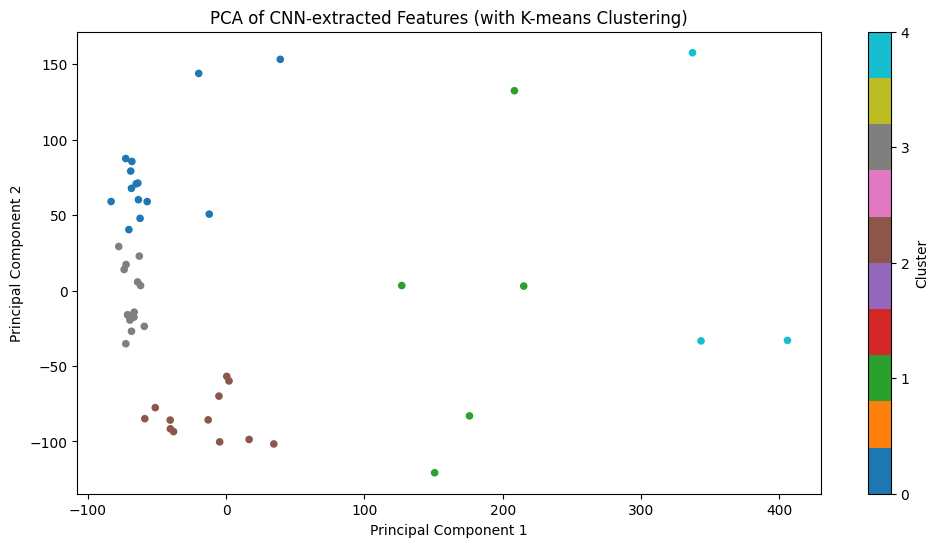

In [ ]:
# Import necessary libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import files
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model



# Extract the filename from the uploaded files
image_path = '/content/james.jpg'

# Function to extract features using VGG16 CNN
def extract_features_with_cnn(image_path):
    # Load the VGG16 model pre-trained on ImageNet, excluding the top layers (we're not interested in classification)
    base_model = VGG16(weights='imagenet', include_top=False)
    model = Model(inputs=base_model.inputs, outputs=base_model.get_layer('block5_pool').output)

    # Load and preprocess the image
    img = cv.imread(image_path)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_resized = cv.resize(img_rgb, (224, 224))  # Resize image to 224x224 as required by VGG16
    img_array = np.expand_dims(img_resized, axis=0)  # Expand dimensions to fit batch format
    img_preprocessed = preprocess_input(img_array)  # Preprocess image

    # Extract features using the VGG16 model
    features = model.predict(img_preprocessed)

    # Reshape features to 2D (samples, features)
    features_reshaped = features.reshape(-1, features.shape[-1])

    return features_reshaped

# Function to perform K-means clustering and compare accuracy with and without PCA
def kmeans_with_and_without_pca(image_path, cluster_n):
    # Step 1: Feature extraction using CNN (VGG16 in this case)
    features = extract_features_with_cnn(image_path)

    # ---------- Without PCA ----------
    # Step 2: Perform K-means clustering on raw CNN features (without PCA)
    kmeans_no_pca = KMeans(n_clusters=cluster_n)
    labels_no_pca = kmeans_no_pca.fit_predict(features)

    # Step 3: Evaluate clustering with silhouette score (without PCA)
    silhouette_no_pca = silhouette_score(features, labels_no_pca)
    print(f"Silhouette Score without PCA: {silhouette_no_pca:.4f}")

    # ---------- With PCA ----------
    # Step 4: Apply PCA to reduce dimensionality for clustering
    pca = PCA(n_components=2)
    features_pca = pca.fit_transform(features)

    # Step 5: Perform K-means clustering on PCA-transformed features
    kmeans_pca = KMeans(n_clusters=cluster_n)
    labels_pca = kmeans_pca.fit_predict(features_pca)

    # Step 6: Evaluate clustering with silhouette score (with PCA)
    silhouette_pca = silhouette_score(features_pca, labels_pca)
    print(f"Silhouette Score with PCA: {silhouette_pca:.4f}")

    # Step 7: Create a scatter plot for PCA
    plt.figure(figsize=(12, 6))
    scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels_pca, cmap='tab10', s=20)
    plt.colorbar(scatter, ticks=range(cluster_n), label='Cluster')
    plt.title('PCA of CNN-extracted Features (with K-means Clustering)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Number of clusters
cluster_n = 5

# Perform K-means clustering with and without PCA and compare silhouette scores
kmeans_with_and_without_pca(image_path, cluster_n)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.3820 - loss: 1.8391 - val_accuracy: 0.4612 - val_loss: 1.6406
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.3968 - loss: 1.7107 - val_accuracy: 0.4612 - val_loss: 1.6044
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.3892 - loss: 1.7081 - val_accuracy: 0.4612 - val_loss: 1.6128
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.4050 - loss: 1.6991 - val_accuracy: 0.4612 - val_loss: 1.6147
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.4032 - loss: 1.6983 - val_accuracy: 0.4612 - val_loss: 1.6107
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.3970 - loss: 1.7137 - val_accuracy: 0.4612 - val_loss: 1.5997
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.3980 - loss: 1.7067 - val_accuracy: 0.4612 - val_loss: 1.5955
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.4017 - loss: 1.7120 - val_accuracy: 0.4612 - val_loss: 1

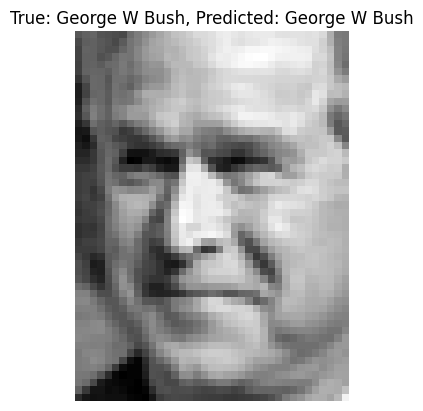

True Label: George W Bush
Predicted Label: George W Bush


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

# Load LFW (Labeled Faces in the Wild) dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.images  # Image data (shape: (n_samples, height, width))
y = lfw_people.target  # Labels
target_names = lfw_people.target_names

# Normalize pixel values (0 to 1 range)
X = X / 255.0

# Reshape the images to add a channel dimension (required for CNN input)
X_reshaped = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)  # Shape: (n_samples, height, width, 1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# One-hot encode the labels
lb = LabelBinarizer()
y_train_encoded = lb.fit_transform(y_train)
y_test_encoded = lb.transform(y_test)

# Build a CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X.shape[1], X.shape[2], 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(target_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {test_accuracy}")

# Select one image from the test set for prediction
index = 11  # You can change this index to any number within the test set size
single_image = X_test[index].reshape(1, X.shape[1], X.shape[2], 1)

# Get the true label for comparison
true_label = y_test[index]

# Predict the class
prediction = model.predict(single_image)
predicted_class = np.argmax(prediction, axis=1)[0]

# Get the predicted and true names
predicted_name = target_names[predicted_class]
true_name = target_names[true_label]

# Display the original image with prediction
plt.imshow(X_test[index].reshape(X.shape[1], X.shape[2]), cmap='gray')
plt.title(f"True: {true_name}, Predicted: {predicted_name}")
plt.axis('off')
plt.show()

# Print the prediction details
print(f"True Label: {true_name}")
print(f"Predicted Label: {predicted_name}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.3550 - loss: 1.7945 - val_accuracy: 0.4612 - val_loss: 1.6204
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4056 - loss: 1.6929 - val_accuracy: 0.4612 - val_loss: 1.6323
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3815 - loss: 1.6993 - val_accuracy: 0.4612 - val_loss: 1.5944
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4024 - loss: 1.6625 - val_accuracy: 0.4690 - val_loss: 1.5827
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4277 - loss: 1.6182 - val_accuracy: 0.4651 - val_loss: 1.5309
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4573 - loss: 1.5648 - val_accuracy: 0.5000 - val_loss: 1.4985
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4684 - loss: 1.5377 - val_accuracy: 0.4845 - val_loss: 1.4679
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4664 - loss: 1.4444 - val_accuracy: 0.5039 - val_los

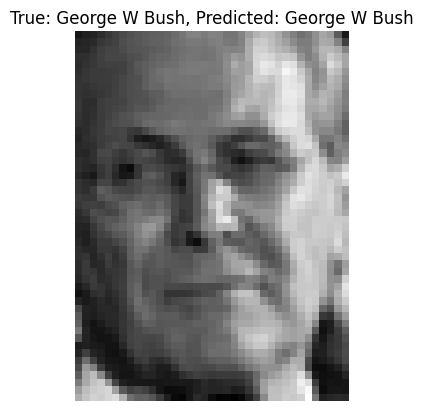

True Label: George W Bush
Predicted Label: George W Bush


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

# Load LFW (Labeled Faces in the Wild) dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.images  # Image data (shape: (n_samples, height, width))
y = lfw_people.target  # Labels
target_names = lfw_people.target_names

# Normalize pixel values
X = X / 255.0

# Flatten the images to apply PCA
n_samples, height, width = X.shape
X_flattened = X.reshape((n_samples, height * width))

# Apply PCA for dimensionality reduction
n_components = 150  # You can tune this number based on your preference
pca = PCA(n_components=n_components, whiten=True, random_state=42)
X_pca = pca.fit_transform(X_flattened)

# Reshape PCA output to the CNN's input shape (back to image format, but with reduced dimensions)
X_pca_reshaped = X_pca.reshape(n_samples, 15, 10, 1)  # Reshaped to simulate image shape (15x10, 1 channel)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_reshaped, y, test_size=0.2, random_state=42)

# One-hot encode the labels
lb = LabelBinarizer()
y_train_encoded = lb.fit_transform(y_train)
y_test_encoded = lb.transform(y_test)

# Build a CNN model
model_pca = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(15, 10, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(target_names), activation='softmax')
])

# Compile the model
model_pca.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_pca.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Evaluate the model
test_loss, test_accuracy = model_pca.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {test_accuracy}")

# Select one image from the test set for prediction
index = 11  # You can change this index to any number within the test set size
single_image = X_test[index].reshape(1, 15, 10, 1)

# Get the true label for comparison
true_label = y_test[index]

# Predict the class
prediction = model_pca.predict(single_image)
predicted_class = np.argmax(prediction, axis=1)[0]

# Get the predicted and true names
predicted_name = target_names[predicted_class]
true_name = target_names[true_label]

# Display the original image with prediction
plt.imshow(X[index].reshape(height, width), cmap='gray')
plt.title(f"True: {true_name}, Predicted: {predicted_name}")
plt.axis('off')
plt.show()

# Print the prediction details
print(f"True Label: {true_name}")
print(f"Predicted Label: {predicted_name}")

Saving team-4451672_640.webp to team-4451672_640.webp
Image 'team-4451672_640.webp' uploaded successfully.
Mask R-CNN Results:
 Precision: 0.0, Recall: [0. 0.], mAP: 0.0
Faster R-CNN Results:
 Precision: 0.0, Recall: [0. 0.], mAP: 0.0


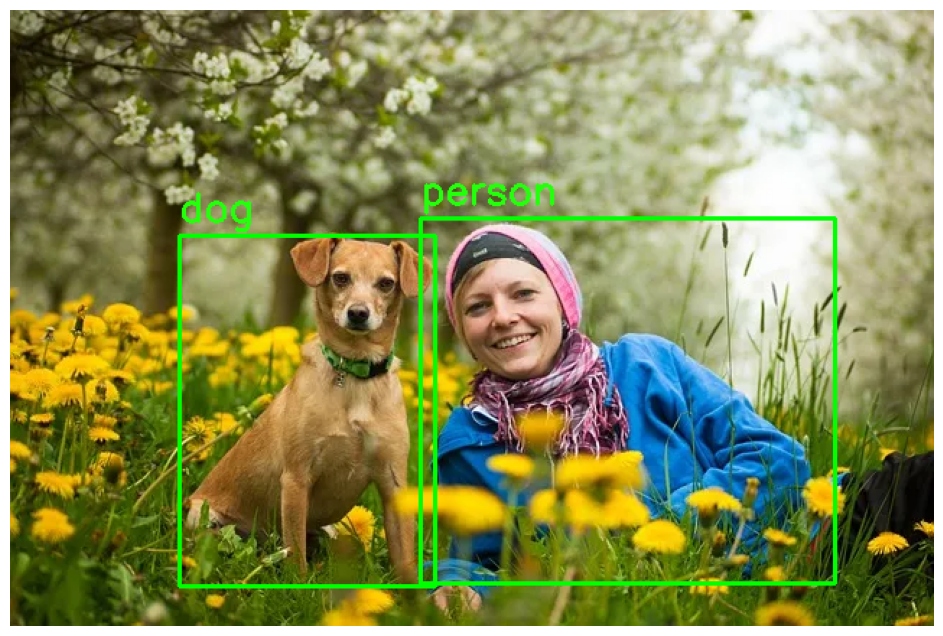

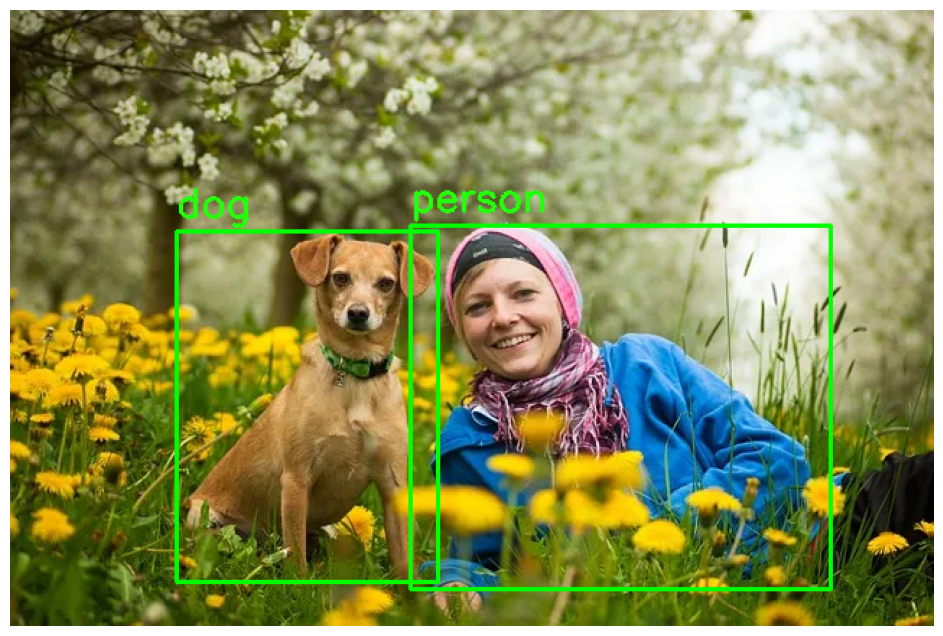

In [ ]:
# Step 2: Import Libraries
import cv2
import numpy as np
import torch
from torchvision import models
import torchvision.transforms as T
from torchvision.ops import box_iou
import matplotlib.pyplot as plt
from google.colab import files
import pycocotools.mask as mask_util

# Step 3: Upload Image File
uploaded = files.upload()

# Step 4: Get the Uploaded File Name
image_path = list(uploaded.keys())[0]  # Get the name of the uploaded file

# Verify if the image was uploaded successfully
if image_path:
    print(f"Image '{image_path}' uploaded successfully.")
else:
    print("Error: No image was uploaded. Please try again.")

# Step 5: Define a function to compute IoU (Intersection over Union)
def compute_iou(boxes1, boxes2):
    ious = box_iou(torch.tensor(boxes1), torch.tensor(boxes2))
    return ious.numpy()

# Step 6: Define function to evaluate precision, recall, and mAP
def evaluate_model(model, image_path, ground_truth_boxes, ground_truth_labels, detection_threshold=0.7):
    # Read and transform the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image_rgb)

    # Perform object detection
    with torch.no_grad():
        output = model([image_tensor])

    # Get detected boxes, labels, and scores
    detected_boxes = output[0]['boxes'].numpy()
    detected_labels = output[0]['labels'].numpy()
    detected_scores = output[0]['scores'].numpy()

    # Filter detections based on the score threshold
    detected_boxes = detected_boxes[detected_scores > detection_threshold]
    detected_labels = detected_labels[detected_scores > detection_threshold]

    # Compute IoU
    ious = compute_iou(ground_truth_boxes, detected_boxes)

    # Set IoU threshold (e.g., 0.5 for loose or 0.75 for stricter evaluation)
    iou_threshold = 0.5
    correct_detections = ious > iou_threshold

    # Compute precision and recall
    precision = np.mean(correct_detections)
    recall = np.mean(correct_detections, axis=0)

    # Compute mAP (optional: simple version based on precision and recall)
    mAP = np.mean(precision)  # Simplified, for detailed mAP you can use pycocotools

    return precision, recall, mAP, detected_boxes, detected_labels

# Step 7: Ground truth boxes and labels (replace this with your own data)
# Example ground truth (Replace with your dataset)
ground_truth_boxes = [[2200, 765, 2545, 878],
 [26, 0, 1098, 776],
  [360, 428, 660, 787],
  [1056, 715, 2111, 872],
  [968, 134, 2213, 864],
  [1069, 110, 2124, 848],
  [1634, 441, 1666, 468],
  [1600, 450, 1625, 468]]
ground_truth_labels = [77,64,86,76,73,72,3,3]

# Step 8: Evaluate Mask R-CNN
maskrcnn_model = models.detection.maskrcnn_resnet50_fpn(pretrained=True)
maskrcnn_model.eval()
precision_maskrcnn, recall_maskrcnn, mAP_maskrcnn, boxes_maskrcnn, labels_maskrcnn = evaluate_model(
    maskrcnn_model, image_path, ground_truth_boxes, ground_truth_labels)

print(f"Mask R-CNN Results:\n Precision: {precision_maskrcnn}, Recall: {recall_maskrcnn}, mAP: {mAP_maskrcnn}")

# Step 9: Evaluate Faster R-CNN
fasterrcnn_model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
fasterrcnn_model.eval()
precision_fasterrcnn, recall_fasterrcnn, mAP_fasterrcnn, boxes_fasterrcnn, labels_fasterrcnn = evaluate_model(
    fasterrcnn_model, image_path, ground_truth_boxes, ground_truth_labels)

print(f"Faster R-CNN Results:\n Precision: {precision_fasterrcnn}, Recall: {recall_fasterrcnn}, mAP: {mAP_fasterrcnn}")

# Step 10: Plot the detections (Optional)
def plot_detections(image_path, detected_boxes, detected_labels, coco_labels):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for i in range(len(detected_boxes)):
        (x1, y1, x2, y2) = detected_boxes[i].astype(int)
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        label = coco_labels[detected_labels[i]]
        cv2.putText(image_rgb, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Define COCO labels for visualization
coco_labels = [
    'background', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
    'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
    'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork',
    'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet',
    'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
    'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Plot the detections for Mask R-CNN and Faster R-CNN
plot_detections(image_path, boxes_maskrcnn, labels_maskrcnn, coco_labels)
plot_detections(image_path, boxes_fasterrcnn, labels_fasterrcnn, coco_labels)